In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

In [76]:
ddf=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [20]:
plt.rcParams['figure.figsize']=('10,5')

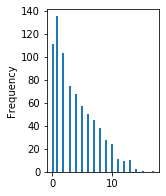

In [7]:
df['Pregnancies'].plot.hist(bins=50)

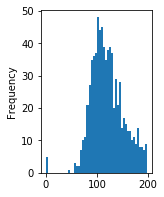

In [8]:
df['Glucose'].plot.hist(bins=50)

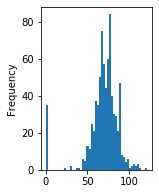

In [9]:
df['BloodPressure'].plot.hist(bins=50)

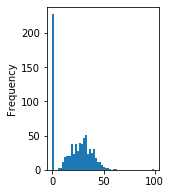

In [10]:
df['SkinThickness'].plot.hist(bins=50)

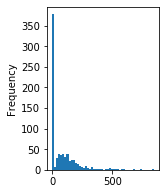

In [11]:
df['Insulin'].plot.hist(bins=50)

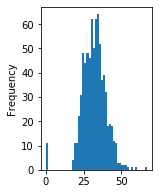

In [12]:
df['BMI'].plot.hist(bins=50)

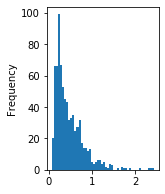

In [13]:
df['DiabetesPedigreeFunction'].plot.hist(bins=50)

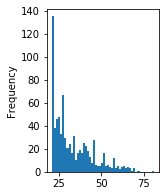

In [14]:
df['Age'].plot.hist(bins=50)

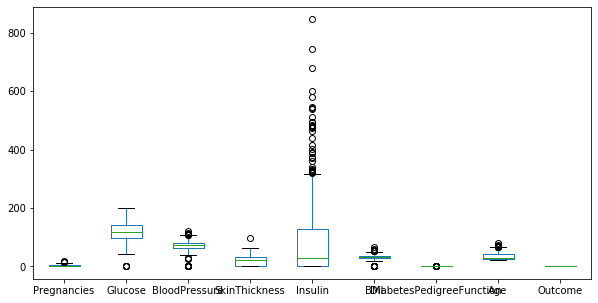

In [21]:
df.plot.box()

In [22]:
from scipy.stats import zscore

In [23]:
z=np.abs(zscore(df))

In [28]:
df=df[(z<3).all(axis=1)]

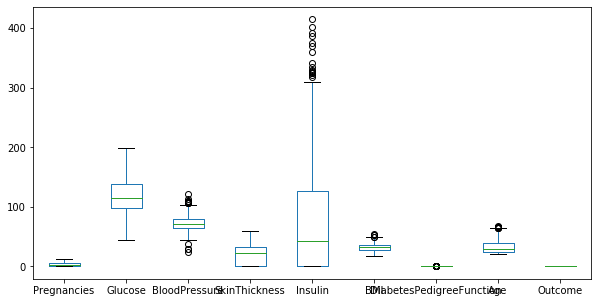

In [29]:
df.plot.box()

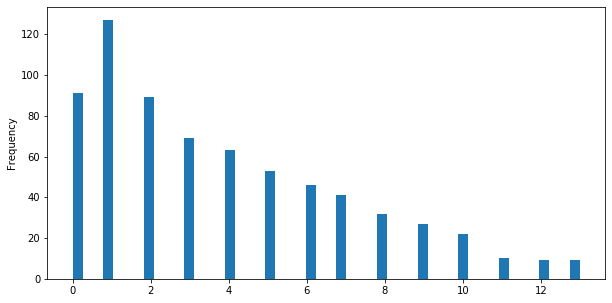

In [30]:
df['Pregnancies'].plot.hist(bins=50)

In [31]:
df.skew()

Pregnancies                 0.814931
Glucose                     0.574478
BloodPressure               0.133396
SkinThickness              -0.079466
Insulin                     1.252364
BMI                         0.374415
DiabetesPedigreeFunction    1.181635
Age                         1.047105
Outcome                     0.724938
dtype: float64

In [32]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [34]:
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

In [40]:
upper_bound

Pregnancies                  13.50000
Glucose                     199.00000
BloodPressure               104.00000
SkinThickness                80.00000
Insulin                     315.00000
BMI                          49.65000
DiabetesPedigreeFunction      1.14625
Age                          64.00000
Outcome                       2.50000
dtype: float64

In [45]:
normal=df[(df>lower_bound) | (df<upper_bound)]

In [48]:
normal.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
normal.skew()

Pregnancies                 0.814931
Glucose                     0.574478
BloodPressure               0.133396
SkinThickness              -0.079466
Insulin                     1.252364
BMI                         0.374415
DiabetesPedigreeFunction    1.181635
Age                         1.047105
Outcome                     0.724938
dtype: float64

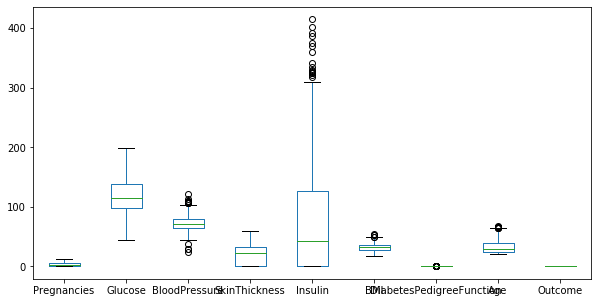

In [50]:
normal.plot.box()

In [64]:
log_t=normal

In [65]:
t=np.sqrt(log_t)

In [66]:
t.skew()

Pregnancies                -0.193807
Glucose                     0.283813
BloodPressure              -0.284462
SkinThickness              -0.667218
Insulin                     0.355821
BMI                         0.111248
DiabetesPedigreeFunction    0.591890
Age                         0.795263
Outcome                     0.724938
dtype: float64

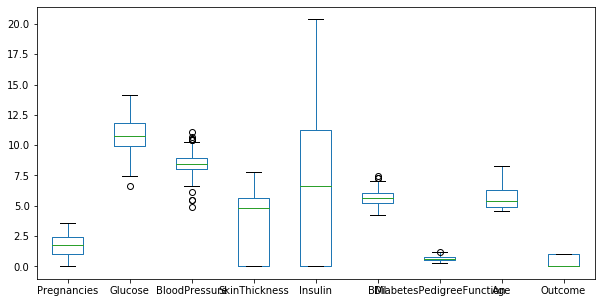

In [67]:
t.plot.box()

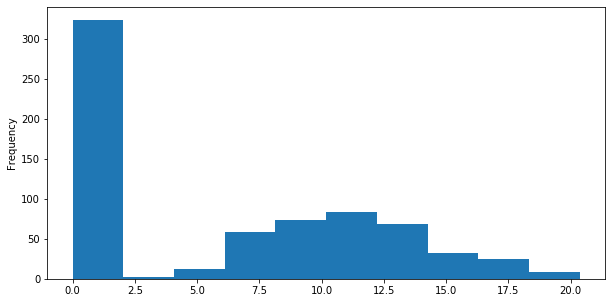

In [69]:
t['Insulin'].plot.hist()

In [71]:
t.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,1.709176,10.884502,8.474027,3.815904,5.935692,5.645476,0.644005,5.675177,0.329942
std,0.962285,1.350510,0.733194,2.497144,6.109754,0.581591,0.199678,0.942411,0.470534
min,0.000000,6.633250,4.898979,0.000000,0.000000,4.266146,0.279285,4.582576,0.000000
25%,1.000000,9.949874,8.000000,0.000000,0.000000,5.234501,0.494975,4.898979,0.000000
50%,1.732051,10.723805,8.485281,4.795832,6.595344,5.656854,0.608276,5.385165,0.000000
75%,2.449490,11.789826,8.944272,5.656854,11.224972,6.024948,0.778139,6.324555,1.000000
max,3.605551,14.106736,11.045361,7.745967,20.371549,7.416198,1.208718,8.246211,1.000000


In [77]:
ddf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [78]:
ddf.shape

(768, 9)

In [79]:
t.shape

(688, 9)

In [144]:
t['Insulin'].replace(0,np.nan,inplace=True)

In [145]:
t.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     324
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [146]:
t['SkinThickness'].replace(0,np.nan,inplace=True)

In [148]:
t.dropna(inplace=True)

In [149]:
t.shape

(364, 9)

In [151]:
t.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,1.548138,10.884711,8.360262,5.257676,11.219109,5.684091,0.679271,5.462464,0.307692
std,0.914513,1.336496,0.750740,1.002603,3.347997,0.576070,0.197374,0.817814,0.462174
min,0.000000,7.483315,4.898979,2.645751,3.872983,4.266146,0.291548,4.582576,0.000000
25%,1.000000,9.937280,7.874008,4.472136,8.703412,5.279676,0.519374,4.795832,0.000000
50%,1.414214,10.816654,8.366600,5.385165,10.954451,5.735852,0.665958,5.196152,0.000000
75%,2.236068,11.789826,8.831761,6.000000,13.416408,6.049793,0.821431,5.937060,1.000000
max,3.605551,14.071247,10.488088,7.745967,20.371549,7.416198,1.183216,7.937254,1.000000


In [153]:
t.skew()

Pregnancies                 0.057066
Glucose                     0.352401
BloodPressure              -0.588324
SkinThickness              -0.199443
Insulin                     0.381632
BMI                        -0.004784
DiabetesPedigreeFunction    0.383319
Age                         1.040670
Outcome                     0.836786
dtype: float64

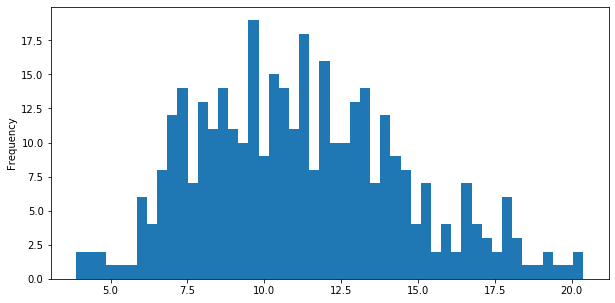

In [155]:
t['Insulin'].plot.hist(bins=50)

In [156]:
t=df

In [157]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.156470,0.229881,-0.097721,-0.080638,0.043549,0.015522,0.569787,0.226382
Glucose,0.156470,1.000000,0.240560,0.008577,0.272654,0.196665,0.104521,0.266930,0.478614
BloodPressure,0.229881,0.240560,1.000000,0.005076,-0.070572,0.274707,0.032757,0.354391,0.182521
SkinThickness,-0.097721,0.008577,0.005076,1.000000,0.462778,0.383819,0.153530,-0.150039,0.056662
Insulin,-0.080638,0.272654,-0.070572,0.462778,1.000000,0.165428,0.183184,-0.081003,0.110062
BMI,0.043549,0.196665,0.274707,0.383819,0.165428,1.000000,0.125714,0.059980,0.298056
DiabetesPedigreeFunction,0.015522,0.104521,0.032757,0.153530,0.183184,0.125714,1.000000,0.060663,0.213872
Age,0.569787,0.266930,0.354391,-0.150039,-0.081003,0.059980,0.060663,1.000000,0.246290
Outcome,0.226382,0.478614,0.182521,0.056662,0.110062,0.298056,0.213872,0.246290,1.000000


In [168]:
lr=LogisticRegression()
from sklearn.metrics import r2_score

In [169]:
x=df.iloc[:,0:-1]

In [170]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [175]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=25,random_state=m)
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    print('accuracy score is :', m+1, accuracy_score(pred,ytest))

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklea

accuracy score is : 1 0.64
accuracy score is : 2 0.76
accuracy score is : 3 0.8
accuracy score is : 4 0.68
accuracy score is : 5 0.84
accuracy score is : 6 0.68
accuracy score is : 7 0.8
accuracy score is : 8 0.76
accuracy score is : 9 0.68
accuracy score is : 10 0.8
accuracy score is : 11 0.92
accuracy score is : 12 0.84
accuracy score is : 13 0.8
accuracy score is : 14 0.68
accuracy score is : 15 0.88
accuracy score is : 16 0.84
accuracy score is : 17 0.8
accuracy score is : 18 0.92
accuracy score is : 19 0.76
accuracy score is : 20 0.76
accuracy score is : 21 0.68
accuracy score is : 22 0.72
accuracy score is : 23 0.6
accuracy score is : 24 0.8
accuracy score is : 25 0.76
accuracy score is : 26 0.8
accuracy score is : 27 0.92
accuracy score is : 28 0.64
accuracy score is : 29 0.84
accuracy score is : 30 0.84
accuracy score is : 31 0.84
accuracy score is : 32 0.72
accuracy score is : 33 0.72
accuracy score is :

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklea

 34 0.68
accuracy score is : 35 0.88
accuracy score is : 36 0.76
accuracy score is : 37 0.64
accuracy score is : 38 0.8
accuracy score is : 39 0.88
accuracy score is : 40 0.92
accuracy score is : 41 0.68
accuracy score is : 42 0.8
accuracy score is : 43 0.84
accuracy score is : 44 0.8
accuracy score is : 45 0.84
accuracy score is : 46 0.84
accuracy score is : 47 0.76
accuracy score is : 48 0.64
accuracy score is : 49 0.88
accuracy score is : 50 0.84
accuracy score is : 51 0.8
accuracy score is : 52 0.76
accuracy score is : 53 0.88
accuracy score is : 54 0.76
accuracy score is : 55 0.92
accuracy score is : 56 0.64
accuracy score is : 57 0.56
accuracy score is : 58 0.6
accuracy score is : 59 0.84
accuracy score is : 60 0.76
accuracy score is : 61 0.92
accuracy score is : 62 0.88
accuracy score is : 63 0.72
accuracy score is : 64 0.64
accuracy score is : 65 0.88
accuracy score is : 66 0.68
accuracy score is : 67 0.72
accuracy score is : 68 0.6
accuracy score is : 69 0.92
accuracy score is

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklea

In [163]:
x.shape

(688, 8)

In [164]:
y.shape

(688, 1)

In [186]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=25,random_state=80)

In [187]:
lr.fit(xtrain,ytrain)

C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\utkarsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
lr.score(xtrain,ytrain)

0.7812971342383107

In [189]:
pred=lr.predict(xtest)

In [190]:
accuracy_score(pred,ytest)

0.96

In [192]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.86      1.00      0.92         6

    accuracy                           0.96        25
   macro avg       0.93      0.97      0.95        25
weighted avg       0.97      0.96      0.96        25



In [194]:
confusion_matrix(pred,ytest)

array([[18,  1],
       [ 0,  6]], dtype=int64)

In [195]:
lr.coef_

array([[ 1.00148300e-01,  2.95404979e-02, -2.37655338e-02,
        -6.52494524e-04, -1.14075590e-03,  6.20304942e-02,
         1.04390429e+00,  7.31098545e-03]])

In [196]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')